In [1]:
from keras.datasets import imdb

In [2]:
((XT,YT),(xt,yt))=imdb.load_data(num_words=10000)

In [3]:
word_idx=imdb.get_word_index()

In [ ]:
#print(word_idx.items())

In [5]:
idx_words=dict([value,key] for (key,value) in word_idx.items())

In [ ]:
#idx_words.items()

In [9]:
idx_words.get?

Signature: idx_words.get(key, default=None, /)
Docstring: Return the value for key if key is in the dictionary, else default.
Type:      builtin_function_or_method


In [7]:
actual_reviews=' '.join([idx_words.get(idx-3,'?') for idx in XT[0]])

In [8]:
print(actual_reviews)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
import numpy as np

In [13]:
def vectorised(sentence,dim=10000):
    outputs=np.zeros((len(sentence), dim))
    for i,idx in enumerate(sentence):
        outputs[i,idx]=1
    return outputs
              

In [14]:
X_train=vectorised(XT)
X_test=vectorised(xt)

In [15]:
Y_train=np.asarray(YT).astype('float32')
Y_test=np.asarray(yt).astype('float32')


In [16]:
from keras import models

In [17]:
from keras.layers import Dense

In [18]:
model=models.Sequential()

In [19]:
model.add(Dense(16,activation="relu",input_shape=(10000,)))

In [20]:
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Training


In [23]:
X_val=X_train[:5000]
Y_val=Y_train[:5000]

X_new_train=X_train[5000:]
Y_new_train=Y_train[5000:]


In [24]:
X_new_train.shape

(20000, 10000)

In [25]:
hist=model.fit(X_new_train,Y_new_train,epochs=4,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/4
40/40 [==============================] - 3s 55ms/step - loss: 0.5117 - accuracy: 0.8051 - val_loss: 0.3852 - val_accuracy: 0.8644
Epoch 2/4
40/40 [==============================] - 1s 19ms/step - loss: 0.3074 - accuracy: 0.9031 - val_loss: 0.3543 - val_accuracy: 0.8492
Epoch 3/4
40/40 [==============================] - 1s 18ms/step - loss: 0.2280 - accuracy: 0.9225 - val_loss: 0.3415 - val_accuracy: 0.8580
Epoch 4/4
40/40 [==============================] - 1s 17ms/step - loss: 0.1847 - accuracy: 0.9374 - val_loss: 0.2852 - val_accuracy: 0.8858


In [26]:
import matplotlib.pyplot as plt

In [27]:
h=hist.history

<function matplotlib.pyplot.show(close=None, block=None)>

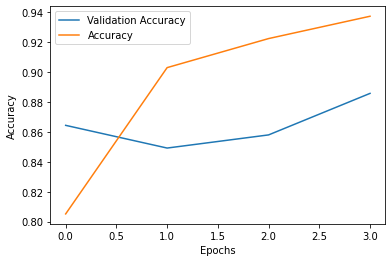

In [28]:
plt.plot(h['val_accuracy'],label="Validation Accuracy")
plt.plot(h['accuracy'],label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [29]:
model.evaluate(X_test,Y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.8797


[0.30143827199935913, 0.8797199726104736]

In [30]:
model.evaluate?

Signature:
model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs,
)
Docstring:
Returns the loss value & metrics values for the model in test mode.

Computation is done in batches (see the `batch_size` arg.)

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
      - A generator or `keras.utils.Sequence` returning `(inputs, targets)`
        or `(inputs, targets, sample_